# Code for Section 4: The discrete inverse Fourier transform
## This code is for learning the Fourier transform.

### mikexcohen.com

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pylab as pl
from IPython import display
import time as ttime
import random
from mpl_toolkits.mplot3d import Axes3D
from scipy import fftpack

---
# VIDEO: Inverse discrete Fourier transform
---


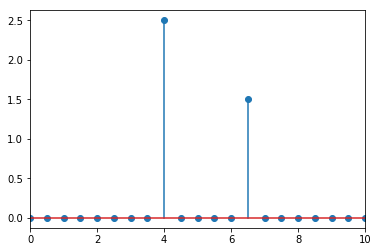

In [3]:
## first, the forward Fourier transform

# create the signal
srate  = 1000 # hz
time   = np.arange(0,2.,1/srate)  # time vector in seconds
pnts   = len(time) # number of time points
signal = 2.5 * np.sin( 2*np.pi*4*time ) + 1.5 * np.sin( 2*np.pi*6.5*time )


# prepare the Fourier transform
fourTime = np.array(np.arange(0,pnts))/pnts
fCoefs   = np.zeros(len(signal),dtype=complex)

for fi in range(0,pnts):
    
    # create complex sine wave
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    
    # compute dot product between sine wave and signal
    fCoefs[fi] = np.sum( np.multiply(signal,csw) )

# extract amplitudes
ampls = np.abs(fCoefs) / pnts
ampls[range(1,len(ampls))] = 2*ampls[range(1,len(ampls))]

# compute frequencies vector
hz = np.linspace(0,srate/2,num=math.floor(pnts/2)+1)

plt.stem(hz,ampls[range(0,len(hz))])
plt.xlim([0,10])
plt.show()

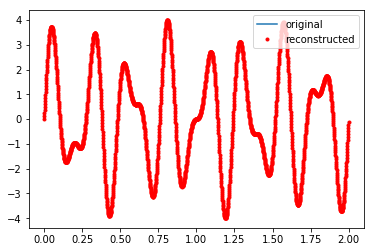

In [4]:
## the inverse Fourier transform

# initialize time-domain reconstruction
reconSignal = np.zeros(len(signal));

for fi in range(0,pnts):
    
    # create coefficient-modulated complex sine wave
    csw = fCoefs[fi] * np.exp( 1j*2*np.pi*fi*fourTime )
    
    # sum them together
    reconSignal = reconSignal + csw


# divide by N
reconSignal = reconSignal/pnts

plt.plot(time,signal,label='original')
plt.plot(time,np.real(reconSignal),'r.',label='reconstructed')
plt.legend()
plt.show() 

# note: signals are entire overlapping. you can try zooming in

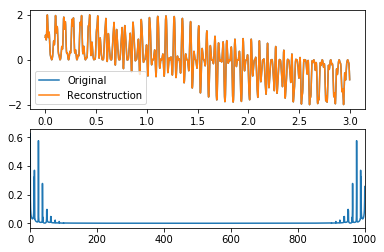

In [20]:
## partial reconstruction of signal
# this differs from the MATLAB code because in-loop graphics updating 
# in python is version- and platform-dependent. Instead, here you can
# specify the proportion of frequencies to use when reconstructing the
# original time-domain signal.


# proportion of frequencies (from 0-srate) to reconstruct (.5 is Nyquist)
propfrex = .5

# set parameters
srate = 1000
time  = np.arange(0,3,1/srate)
pnts  = len(time)

# create multispectral signal
signal  = np.multiply( (1+np.sin(2*np.pi*12*time)) , np.cos(np.sin(2*np.pi*25*time)+time) )

# prepare the Fourier transform
fourTime = np.array(range(0,pnts))/pnts
fCoefs   = np.zeros(len(signal),dtype=complex)

# here is the Fourier transform...
for fi in range(0,pnts):
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    fCoefs[fi] = np.sum( np.multiply(signal,csw) ) / pnts


# frequencies in Hz (goes up to srate just as a coding trick for later visualization)
hz = np.linspace(0,srate,num=pnts)

# initialize the reconstructed signal
reconSignal = np.zeros(len(signal),dtype=complex)

# inverse Fourier transform here
for fi in range(0,pnts):#np.int(propfrex*pnts)):
    
    # create coefficient-modulated complex sine wave
    csw = fCoefs[fi] * np.exp( 1j*2*np.pi*fi*fourTime )
    
    # sum them together
    reconSignal = reconSignal + csw
    
    if fi<300 or fi>2700:
        # set up plot
        pl.cla() # wipe the figure
        plt.subplot2grid((2,1),(0,0))
        plt.plot(time,signal,label='Original')
        plt.plot(time,np.real(reconSignal),label='Reconstruction')
        plt.legend()
        
        plt.subplot2grid((2,1),(1,0))
        plt.plot(hz[0:fi],2*np.abs(fCoefs[0:fi]))
        plt.xlim([0,hz[-1]])

        # show plot
        display.clear_output(wait=True)
        display.display(pl.gcf())
        ttime.sleep(.01)


---
# VIDEO: Inverse Fourier transform for signal processing
---


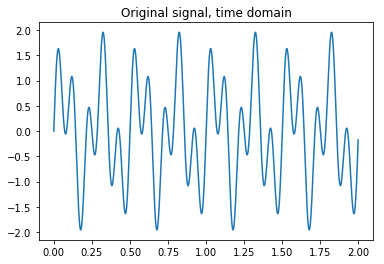

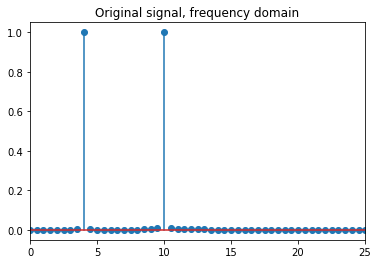

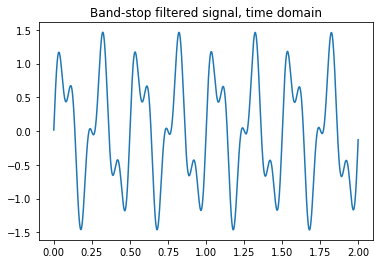

In [75]:
## bandpass filter

# simulation params
srate = 1000
time  = np.arange(0,2-1/srate,1/srate)
pnts  = len(time)

# signal 
signal = np.sin(2*np.pi*4*time) + np.sin(2*np.pi*10*time)


# Fourier transform
fourTime = np.array(np.arange(0,pnts))/pnts
fCoefs   = np.zeros(len(signal),dtype=complex)

for fi in range(0,pnts):
    
    # create complex sine wave
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    
    # compute dot product between sine wave and signal
    fCoefs[fi] = np.sum( np.multiply(signal,csw) )/pnts


# frequencies in Hz
hz = np.linspace(0,srate/2,int(np.floor(pnts/2.0)+1))

# find the coefficient for 10 Hz
freqidx = np.argmin(np.abs(hz-10))

# set that coefficient to zero
fCoefsMod = list(fCoefs)
fCoefsMod[freqidx] = 0


# and compute inverse
reconMod = np.zeros(len(signal),dtype=complex)
for fi in range(0,pnts):
    csw = fCoefsMod[fi] * np.exp( 1j*2*np.pi*fi*fourTime )
    reconMod = reconMod + csw



# now plot
plt.plot(time,signal)
plt.title('Original signal, time domain')
plt.show()

# plot original amplitude spectrum
plt.stem(hz,2*np.abs(fCoefs[0:len(hz)]))
plt.xlim([0,25])
plt.title('Original signal, frequency domain')
plt.show()

# and plot modulated time series
plt.plot(time,np.real(reconMod))
plt.title('Band-stop filtered signal, time domain')
plt.show()


In [8]:
## bandpass filter

# simulation params
srate = 1000
time  = np.arange(0,2-1/srate,1/srate)
pnts  = len(time)

fourTime = np.array(np.arange(0,pnts))/pnts
fCoefs   = np.zeros(len(signal),dtype=complex)

# signal 
signal = np.sin(2*np.pi*4*time) + np.sin(2*np.pi*10*time)

In [9]:
import scipy.signal
import scipy.fftpack

In [63]:
print(len(hz),len(time))

1000 1999


In [64]:
hz

array([  0.        ,   0.5005005 ,   1.001001  ,   1.5015015 ,
         2.002002  ,   2.5025025 ,   3.003003  ,   3.5035035 ,
         4.004004  ,   4.5045045 ,   5.00500501,   5.50550551,
         6.00600601,   6.50650651,   7.00700701,   7.50750751,
         8.00800801,   8.50850851,   9.00900901,   9.50950951,
        10.01001001,  10.51051051,  11.01101101,  11.51151151,
        12.01201201,  12.51251251,  13.01301301,  13.51351351,
        14.01401401,  14.51451451,  15.01501502,  15.51551552,
        16.01601602,  16.51651652,  17.01701702,  17.51751752,
        18.01801802,  18.51851852,  19.01901902,  19.51951952,
        20.02002002,  20.52052052,  21.02102102,  21.52152152,
        22.02202202,  22.52252252,  23.02302302,  23.52352352,
        24.02402402,  24.52452452,  25.02502503,  25.52552553,
        26.02602603,  26.52652653,  27.02702703,  27.52752753,
        28.02802803,  28.52852853,  29.02902903,  29.52952953,
        30.03003003,  30.53053053,  31.03103103,  31.53

In [52]:
# Fourier transform
'''fourTime = np.array(np.arange(0,pnts))/pnts
fCoefs   = np.zeros(len(signal),dtype=complex)

for fi in range(0,pnts):
    
    # create complex sine wave
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    
    # compute dot product between sine wave and signal
    fCoefs[fi] = np.sum( np.multiply(signal,csw) )/pnts

'''
fCoefs = scipy.fftpack.fft(signal)


# frequencies in Hz
hz = np.linspace(0,srate/2,int(np.floor(pnts/2.0)+1))

# find the coefficient for 10 Hz
freqidx = np.argmin(np.abs(hz-10))

# set that coefficient to zero
fCoefsMod = list(fCoefs)
fCoefsMod[freqidx] = 0
#fCoefsMod[freqidx2] = 0

In [74]:
len(hz)

1000

In [47]:
#hz[19]
#len(hz)
hz[len(hz)-21]

489.98998998999

In [41]:
a

array([], dtype=float64)

In [ ]:
# and compute inverse
reconMod = np.zeros(len(signal),dtype=complex)
for fi in range(0,pnts):
    csw = fCoefsMod[fi] * np.exp( 1j*2*np.pi*fi*fourTime )
    reconMod = reconMod + csw

signalX = scipy.fftpack.ifft(fCoefsMod)

# now plot
plt.plot(time,signal)
plt.title('Original signal, time domain')
plt.show()

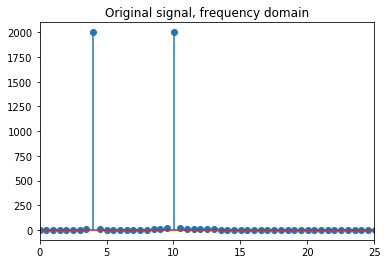

In [73]:
# plot original amplitude spectrum
plt.stem(hz,2*np.abs(fCoefs[0:len(hz)]))

plt.xlim([0,25])
plt.title('Original signal, frequency domain')
plt.show()

In [71]:
hz

array([  0.        ,   0.5005005 ,   1.001001  ,   1.5015015 ,
         2.002002  ,   2.5025025 ,   3.003003  ,   3.5035035 ,
         4.004004  ,   4.5045045 ,   5.00500501,   5.50550551,
         6.00600601,   6.50650651,   7.00700701,   7.50750751,
         8.00800801,   8.50850851,   9.00900901,   9.50950951,
        10.01001001,  10.51051051,  11.01101101,  11.51151151,
        12.01201201,  12.51251251,  13.01301301,  13.51351351,
        14.01401401,  14.51451451,  15.01501502,  15.51551552,
        16.01601602,  16.51651652,  17.01701702,  17.51751752,
        18.01801802,  18.51851852,  19.01901902,  19.51951952,
        20.02002002,  20.52052052,  21.02102102,  21.52152152,
        22.02202202,  22.52252252,  23.02302302,  23.52352352,
        24.02402402,  24.52452452,  25.02502503,  25.52552553,
        26.02602603,  26.52652653,  27.02702703,  27.52752753,
        28.02802803,  28.52852853,  29.02902903,  29.52952953,
        30.03003003,  30.53053053,  31.03103103,  31.53

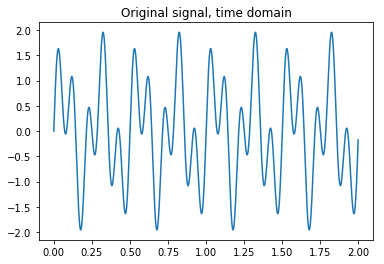

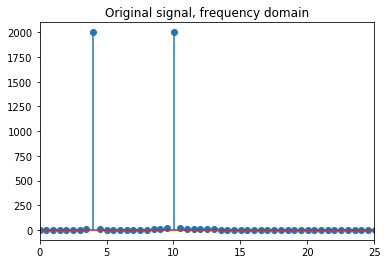

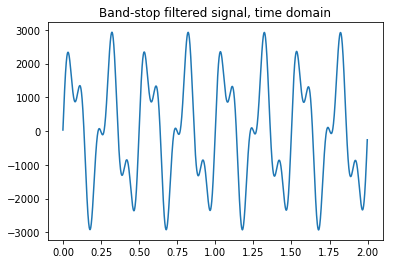

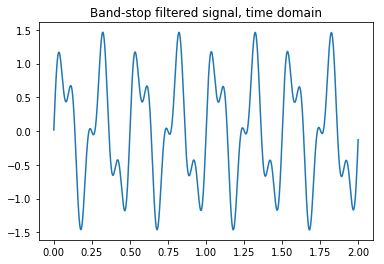

In [56]:
# and plot modulated time series
plt.plot(time,np.real(reconMod))
plt.title('Band-stop filtered signal, time domain')
plt.show()

plt.plot(time,np.real(signalX))
plt.title('Band-stop filtered signal, time domain')
plt.show()